<a href="https://colab.research.google.com/github/mpratiek/END_NLP/blob/main/Back_Prop_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sigmoid_activation(x):
  return 1/(1+ np.exp(-x))

In [3]:
def gradient_w5(t1, a_o1, a_h1):
  return (a_o1 - t1)*a_o1*(1-a_o1)*a_h1

def gradient_w6(t1, a_o1, a_h2):
  return (a_o1 - t1)*a_o1*(1-a_o1)*a_h2

def gradient_w7(t2, a_o2, a_h1):
  return (a_o2 - t2)*a_o2*(1-a_o2)*a_h1

def gradient_w8(t2, a_o2, a_h2):
  return (a_o2 - t2)*a_o2*(1-a_o2)*a_h2

In [4]:
def gradient_w1(t1, a_o1, a_h1, t2, a_o2, a_h2, w5, w7,i1 ):
  return ( (a_o1 - t1)*a_o1*(1-a_o1)*w5 + (a_o2 - t2)*a_o2*(1-a_o2)* w7 ) * (a_h1 * (1-a_h1)* i1)

def gradient_w2(t1, a_o1, a_h1, t2, a_o2, a_h2, w5, w7,i2):
  return ( (a_o1 - t1)*a_o1*(1-a_o1)*w5 + (a_o2 - t2)*a_o2*(1-a_o2)* w7 ) * (a_h1 * (1-a_h1)* i2)

def gradient_w3(t1, a_o1, a_h1, t2, a_o2, a_h2, w6, w8,i1 ):
  return ( (a_o1 - t1)*a_o1*(1-a_o1)*w6 + (a_o2 - t2)*a_o2*(1-a_o2)* w8 ) * (a_h2 * (1-a_h2)* i1)

def gradient_w4(t1, a_o1, a_h1, t2, a_o2, a_h2, w6, w8,i2 ):
  return ( (a_o1 - t1)*a_o1*(1-a_o1)*w6 + (a_o2 - t2)*a_o2*(1-a_o2)* w8 ) * (a_h2 * (1-a_h2)* i2)

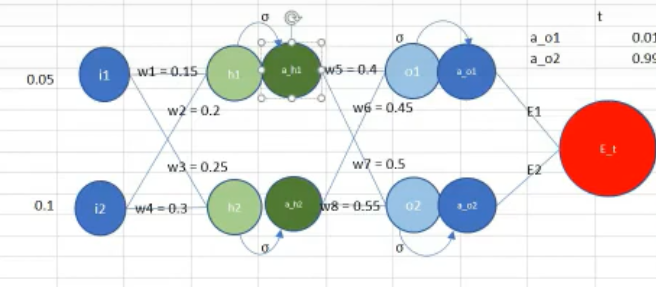

In [5]:
steps = 100
lr_list = [0.1, 0.2, 0.8, 1.0, 2.0,0.5]

In [6]:
i1 = 0.05
i2 = 0.1

In [7]:
t1= 0.01
t2= 0.99

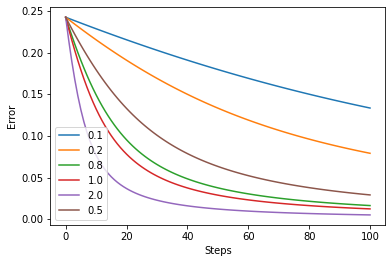

In [22]:
for lr in lr_list:
  
  w1,w2,w3,w4,w5,w6,w7,w8 = 0.15,0.2,0.25,0.3,0.4,0.45,0.5,0.55
  h1 = w1*i1 + w2*i2
  h2 = w3*i1 + w4*i2
  a_h1 = sigmoid_activation(h1)
  a_h2 = sigmoid_activation(h2)
  o1 = w5 * a_h1 + w6 * a_h2
  o2 = w7 * a_h1 + w8 * a_h2
  a_o1 = sigmoid_activation(o1)
  a_o2 = sigmoid_activation(o2)
  E1 = 0.5 * (t1 - a_o1)**2
  E2 = 0.5 * (t2 - a_o2)**2
  E= E1 + E2
  e_list = [E]
  for i in range(steps):
    w5 = w5- lr * gradient_w5(t1, a_o1, a_h1)
    w6 = w6- lr * gradient_w6(t1, a_o1, a_h2)
    w7 = w7- lr * gradient_w7(t2, a_o2, a_h1)
    w8 = w8- lr * gradient_w8(t2, a_o2, a_h2)

    w1 = w1- lr * gradient_w1(t1, a_o1, a_h1, t2, a_o2, a_h2, w5, w7,i1 )
    w2 = w2- lr * gradient_w2(t1, a_o1, a_h1, t2, a_o2, a_h2, w5, w7,i2)
    w3 = w3- lr * gradient_w3(t1, a_o1, a_h1, t2, a_o2, a_h2, w6, w8,i1 )
    w4 = w4- lr * gradient_w4(t1, a_o1, a_h1, t2, a_o2, a_h2, w6, w8,i2 )

    h1 = w1*i1 + w2*i2
    h2 = w3*i1 + w4*i2
    a_h1 = sigmoid_activation(h1)
    a_h2 = sigmoid_activation(h2)

    o1 = w5 * a_h1 + w6 * a_h2
    o2 = w7 * a_h1 + w8 * a_h2
    a_o1 = sigmoid_activation(o1)
    a_o2 = sigmoid_activation(o2)

    E1 = 0.5 * (t1 - a_o1)**2
    E2 = 0.5 * (t2 - a_o2)**2
    E= E1 + E2
    e_list.append(E)
  
  plt.plot(e_list)
  plt.xlabel('Steps')
  plt.ylabel('Error')
  plt.legend([0.1, 0.2, 0.8, 1.0, 2.0,0.5])

In [9]:
e_list

[0.24251985734837728,
 0.2354954325223307,
 0.2286202126444858,
 0.22189921682823904,
 0.21533687851760824,
 0.2089370012474561,
 0.20270272720174845,
 0.19663651866581283,
 0.19074015202090377,
 0.18501472353921264,
 0.17946066591869447,
 0.17407777425754348,
 0.16886524000984052,
 0.16382169138365926,
 0.1589452386334253,
 0.15423352274930938,
 0.14968376614588919,
 0.14529282408761834,
 0.14105723574754195,
 0.136973273966983,
 0.13303699295798768,
 0.12924427335932115,
 0.12559086421485077,
 0.1220724215861101,
 0.11868454363622519,
 0.11542280212908793,
 0.11228277037566797,
 0.1092600477294875,
 0.10635028078694,
 0.10354918148707754,
 0.10085254233166162,
 0.09825624896165462,
 0.09575629033284185,
 0.09334876673270363,
 0.09102989587461054,
 0.08879601729529984,
 0.08664359526860876,
 0.08456922043359191,
 0.08256961031924887,
 0.08064160893177981,
 0.07878218555407498,
 0.07698843289139193,
 0.07525756468215905,
 0.07358691287873928,
 0.07197392448990368,
 0.07041615816476283,

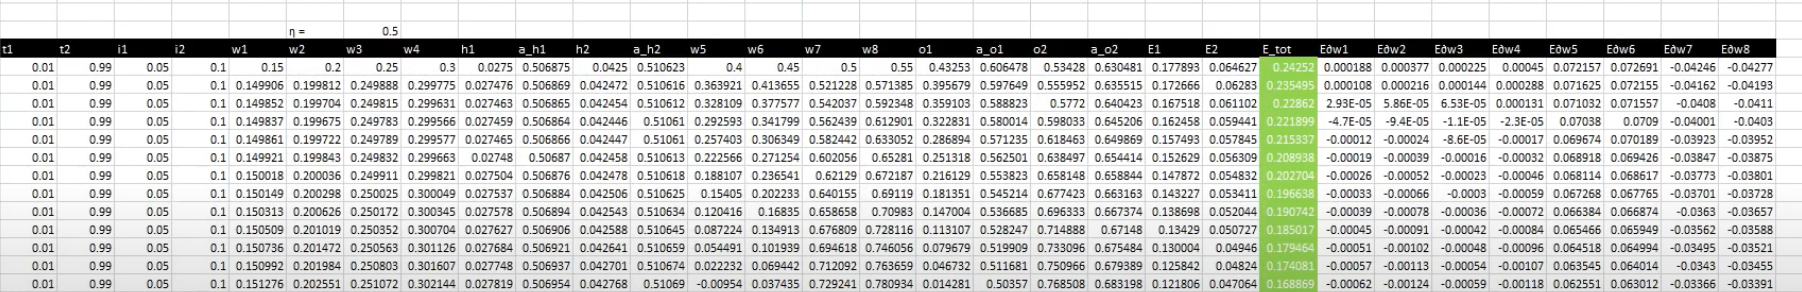

In [10]:
verification_for_LR_05 = [0.24251985734837728,
 0.2354954325223307,
 0.2286202126444858,
 0.22189921682823904,
 0.21533687851760824,
 0.2089370012474561,
 0.20270272720174845,
 0.19663651866581283,
 0.19074015202090377,
 0.18501472353921264,
 0.17946066591869447,
 0.17407777425754348,
 0.16886524000984052]